<a href="https://colab.research.google.com/github/iesous-kurios/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module3-dimensionality-reduction/GJW_High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
a = np.array([2, 4])
b = np.array([2, 1, 4, 3, 1])

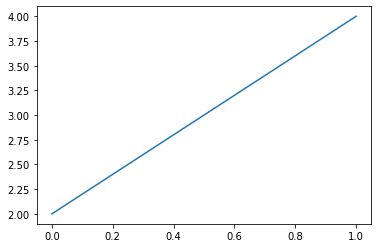

In [3]:
plt.plot(a)

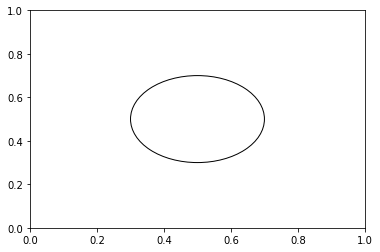

In [4]:
import matplotlib.pyplot as plt

circle2 = plt.Circle((0.5, 0.5), 0.2, fill=None)

fig, ax = plt.subplots() 

ax.add_artist(circle2)


## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Functions only have one output per input.  Graphs that
don't pass the vertical line test have two outputs for one input

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

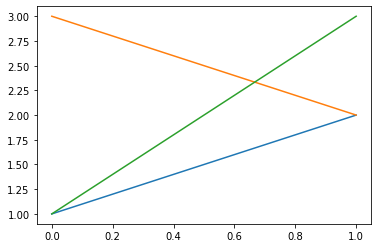

In [5]:
a = np.array([1,2])
b = np.array([3,2])
c = np.array([1,3])
plt.plot(a)
plt.plot(b)
plt.plot(c)
plt.show()

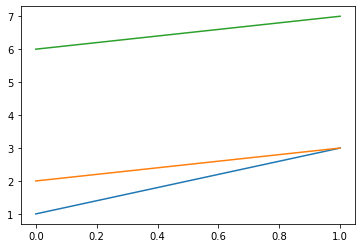

In [6]:
a = np.array([1,3])
b = np.array([2,3])
c = np.array([6,7])
plt.plot(a)
plt.plot(b)
plt.plot(c)
plt.show()

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

# Principal Component Analysis

## 7.1 Code for loading and cleaning the 2013 national dataset from the [Housing Affordability Data System (HADS)](https://www.huduser.gov/portal/datasets/hads/hads.html) --housing data, can be found below. 

## Perform PCA on the processed dataset `national_processed` (Make sure you standardize your data!) and then make a scatterplot of PC1 against PC2. Some of our discussion and work around PCA with this dataset will continue during tomorrow's lecture and assignment.

Not only does this dataset have decent amount columns to begin with (99), but in preparing the data for PCA we have also [one-hot-encoded](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f#targetText=One%20hot%20encoding%20is%20a,the%20entry%20in%20the%20dataset.) all of the categorical variables. This has the effect of creating a new column for each individual category of each categorical variable. After processing this dataset has 64738 columns. --Das a lot of columns.

Don't worry too much about the mechanics of one-hot encoding right now, you will learn and experiment with a whole bunch of categorical encoding approaches in unit 2. 

The code below will read in the dataset and perform the one-hot encoding of the categorical variables. Start adding your PCA code at the bottom of the provided code.

In [0]:
import os.path
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import pandas as pd

# Read National Data 
national_url = 'https://www.huduser.gov/portal/datasets/hads/hads2013n_ASCII.zip'
national_file = 'thads2013n.txt'

if os.path.exists(national_file):
    national = pd.read_csv(national_file)
else: 
    z_national = urlopen(national_url)
    zip_national = ZipFile(BytesIO(z_national.read())).extract(national_file)
    national = pd.read_csv(zip_national)

In [8]:
# Look at first 5 rows
print(national.shape)
national.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'100003130103',82,'3','1',73738,956,15738,26213,40322,11067,2,2006,'1',1,40000,-6,'1',1,6,3117.394239,1,18021,'1',533,1,'1',169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,'1 Adequate','-5','2000-2009','1 Single Family','2 2BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','1 LTE 50% FMR','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','.','2 30% to 50%','-5','-5'
1,'100006110249',50,'5','3',55846,1100,17165,28604,45744,24218,4,1980,'1',1,130000,-6,'1',1,6,2150.725544,4,122961,'1',487,1,'1',245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','3 150-200% Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'100006370140',53,'5','3',55846,1100,13750,22897,36614,15470,4,1985,'1',1,150000,-6,'1',1,7,2213.789404,2,27974,'1',1405,1,'1',159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','4 60 - 80% AMI','.','3 50% or More','-5','-5'
3,'100006520140',67,'5','3',55846,949,13750,22897,36614,13964,3,1985,'1',1,200000,-6,'1',1,6,2364.585097,2,32220,'1',279,1,'1',179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,'1 Adequate','-5','1980-1989','1 Single Family','3 3BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','6 100 - 120% AMI','7 120% AMI +','7 120% AMI +','5 80 - 100% AMI','4 60 - 80% AMI','.','1 Less than 30%','-5','-5'
4,'100007130148',26,'1','3',60991,737,14801,24628,39421,15492,2,1980,'1',1,-6,-6,'2',100,4,2314.524902,2,96874,'1',759,5,'2',146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.98

In [9]:
# Look at datatypes
# a lot of object datatypes even though they look to be strings of numbers.
national.dtypes

CONTROL            object
AGE1                int64
METRO3             object
REGION             object
LMED                int64
                    ...  
FMTINCRELAMICAT    object
FMTASSISTED        object
FMTBURDEN          object
FMTREGION          object
FMTSTATUS          object
Length: 99, dtype: object

In [10]:
# check for null values
national.isnull().sum().any()

False

In [11]:
# check for number of categorical vs numeric columns
cat_cols = national.columns[national.dtypes=='object']
num_cols = national.columns[national.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

32 categorical columns
67 numerical columns


In [12]:
national_processed = national.copy()

# Get One-Hot-Encoding of categorical variables
national_processed = pd.get_dummies(national_processed)
print(national_processed.shape)
national_processed.head()

(64535, 64738)


,AGE1,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,TYPE,VALUE,VACANCY,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZSMHC,STRUCTURETYPE,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,ABL50,ABL80,ABLMED,BURDEN,INCRELAMIPCT,INCRELAMICAT,INCRELPOVPCT,...,FMTCOST08RELAMICAT_'1 LTE 30% AMI',FMTCOST08RELAMICAT_'2 30 - 50% AMI',FMTCOST08RELAMICAT_'3 50 - 60% AMI',FMTCOST08RELAMICAT_'4 60 - 80% AMI',FMTCOST08RELAMICAT_'5 80 - 100% AMI',FMTCOST08RELAMICAT_'6 100 - 120% AMI',FMTCOST08RELAMICAT_'7 120% AMI +',FMTCOST12RELAMICAT_'1 LTE 30% AMI',FMTCOST12RELAMICAT_'2 30 - 50% AMI',FMTCOST12RELAMICAT_'3 50 - 60% AMI',FMTCOST12RELAMICAT_'4 60 - 80% AMI',FMTCOST12RELAMICAT_'5 80 - 100% AMI',FMTCOST12RELAMICAT_'6 100 - 120% AMI',FMTCOST12RELAMICAT_'7 120% AMI +',FMTCOSTMEDRELAMICAT_'1 LTE 30% AMI',FMTCOSTMEDRELAMICAT_'2 30 - 50% AMI',FMTCOSTMEDRELAMICAT_'3 50 - 60% AMI',FMTCOSTMEDRELAMICAT_'4 60 - 80% AMI',FMTCOSTMEDRELAMICAT_'5 80 - 100% AMI',FMTCOSTMEDRELAMICAT_'6 100 - 120% AMI',FMTCOSTMEDRELAMICAT_'7 120% AMI +',FMTINCRELAMICAT_'.',FMTINCRELAMICAT_'1 LTE 30% AMI',FMTINCRELAMICAT_'2 30 - 50% AMI',FMTINCRELAMICAT_'3 50 - 60% AMI',FMTINCRELAMICAT_'4 60 - 80% AMI',FMTINCRELAMICAT_'5 80 - 100% AMI',FMTINCRELAMICAT_'6 100 - 120% AMI',FMTINCRELAMICAT_'7 120% AMI +',FMTASSISTED_'.',FMTASSISTED_'0 Not Assisted',FMTASSISTED_'1 Assisted',FMTBURDEN_'.',FMTBURDEN_'1 Less than 30%',FMTBURDEN_'2 30% to 50%',FMTBURDEN_'3 50% or More',FMTBURDEN_'4 No Income',FMTREGION_'-5',FMTREGION_'West',FMTSTATUS_'-5'
0,82,73738,956,15738,26213,40322,11067,2,2006,1,40000,-6,1,6,3117.394239,1,18021,533,1,169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,33702.428571,51842.571429,66364.20,0.354919,34.913187,2,162.835457,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1
1,50,55846,1100,17165,28604,45744,24218,4,1980,1,130000,-6,1,6,2150.725544,4,122961,487,1,245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,33180.640000,53063.040000,64781.36,0.047527,220.178706,7,507.725659,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1
2,53,55846,1100,13750,22897,36614,15470,4,1985,1,150000,-6,1,7,2213.789404,2,27974,1405,1,159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,33200.650000,53090.300000,64781.36,0.602703,62.614153,4,180.827408,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1
3,67,55846,949,13750,22897,36614,13964,3,1985,1,200000,-6,1,6,2364.585097,2,32220,279,1,179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,29766.100000,47598.200000,58079.84,0.103911,72.117967,4,230.736179,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1
4,26,60991,737,14801,24628,39421,15492,2,1980,1,-6,-6,100,4,2314.524902,2,96874,759,5,146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,27706.500000,44348.625000,54891.90,0.094019,198.541588,7,625.316292,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1


In [0]:
def pca_function(df, threshold, show_scree_plot=True, 
                 scaled=False, excluded_cols=None):
  '''
  Takes a pandas dataframe and a desired threshold, scales the numeric features 
  and performs principal component analysis dimension reduction, and returns
  a pandas dataframe of lower dimensionality and variance explained to the given
  threshold
    
  Parameters
  ----------
  df : pandas dataframe
      The dataframe containing data to perform PCA on
      
  threshold : The desired % of variance explained to be included in the return;
              must be an number between 0 and 100
  
  show_scree_plot : Bool indicating whether or not to display scree plot showing 
                    the % variance explained by each principal component; 
                    default set to True
  
  scaled : Bool indicating whether the numeric data has been scaled; default set 
           to False
  
  exclude_cols : list of numeric columns to exclude from PCA; default set to None

  Returns
  -------
  dataframe:
      a pandas dataframe where the numeric columns have been scaled and 
      dimensions reduced to the number of principal components which explain
      the variance at a given threshold
  '''
  
  #confirm proper threshold input:
  if threshold < 0 or threshold > 100:
    return 'Incorrect threshold input, must be a number between 0 and 100'
  
  #library imports
  from sklearn.decomposition import PCA 
  from sklearn.preprocessing import StandardScaler 
  import seaborn as sns
  
  X = df.copy()
  
  if excluded_cols != None:
    X = X.drop(columns=excluded_cols)
    
  #use only the numeric columns that have not been excluded
  numeric_cols = X.select_dtypes(include='number').columns.tolist()
  X = X[numeric_cols].values
  
  if scaled == False:
    #scale the data:
    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(X)
  else:
    scaled_X = X
    
  #calc the principal component variance
  n = len(numeric_cols)
  covar_matrix = PCA(n_components = n)
  covar_matrix.fit(scaled_X)
  
  ##calculate variance ratios
  variance = covar_matrix.explained_variance_ratio_
  cumulative_var = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
     
  #function for calculating number of principal components to use:
  def calc_num_components(cum_var, threshold):
    for i in range(n):
      if cum_var[i] >= threshold:
        return i+1
  
  #call the function to calulate num_components:
  n_components = calc_num_components(cumulative_var, threshold)
  
  # create the PCA instance
  pca = PCA(n_components = n_components)
  principal_components = pca.fit_transform(scaled_X)

  #scree plot function
  '''
  colors = ['red' if x == n_components else 'grey' for x in X_vals]
  sb.barplot(x=idx, y=values, palette=colors)'''

  def make_scree(cumulative_variance, threshold):
    import matplotlib.pyplot as plt
    import seaborn as sns
  
    n = len(cumulative_variance)
    y_vals = [num for num in cumulative_variance]
    x_vals = [num for num in range(1,n+1)]
    
    colors = ['red' if x == n_components else '#769ddb' for x in x_vals]
    width = min(n/3, 20)
    height = min(n/4, 16)
    fig, ax = plt.subplots(figsize=(width,height))
    ax.grid(True)
    ax.set_title('Principal Components Cumulative Variance')
    ax.set_ylabel('Cumulative Variance % Explained')
    ax.set_xlabel('Principal Components')
  
    # threshold var
    ax.axhline(threshold, color='black', linewidth=1);
    sns.barplot(x=x_vals, y=y_vals, ax=ax, palette=colors)
    plt.show()
  
  if show_scree_plot:
    #plot it:
    make_scree(cumulative_var, threshold)
 
  #convert to pandas df:
  pc_df = pd.DataFrame(data = principal_components, 
                       columns = ['component_' + str(i) for i in range(1, n_components+1)])
  
  #return df which is original df w/ the numeric cols dropped and replaced w/
  #principal components df
  
  df = pd.concat([df, pc_df], axis=1).drop(columns = numeric_cols)
  return df

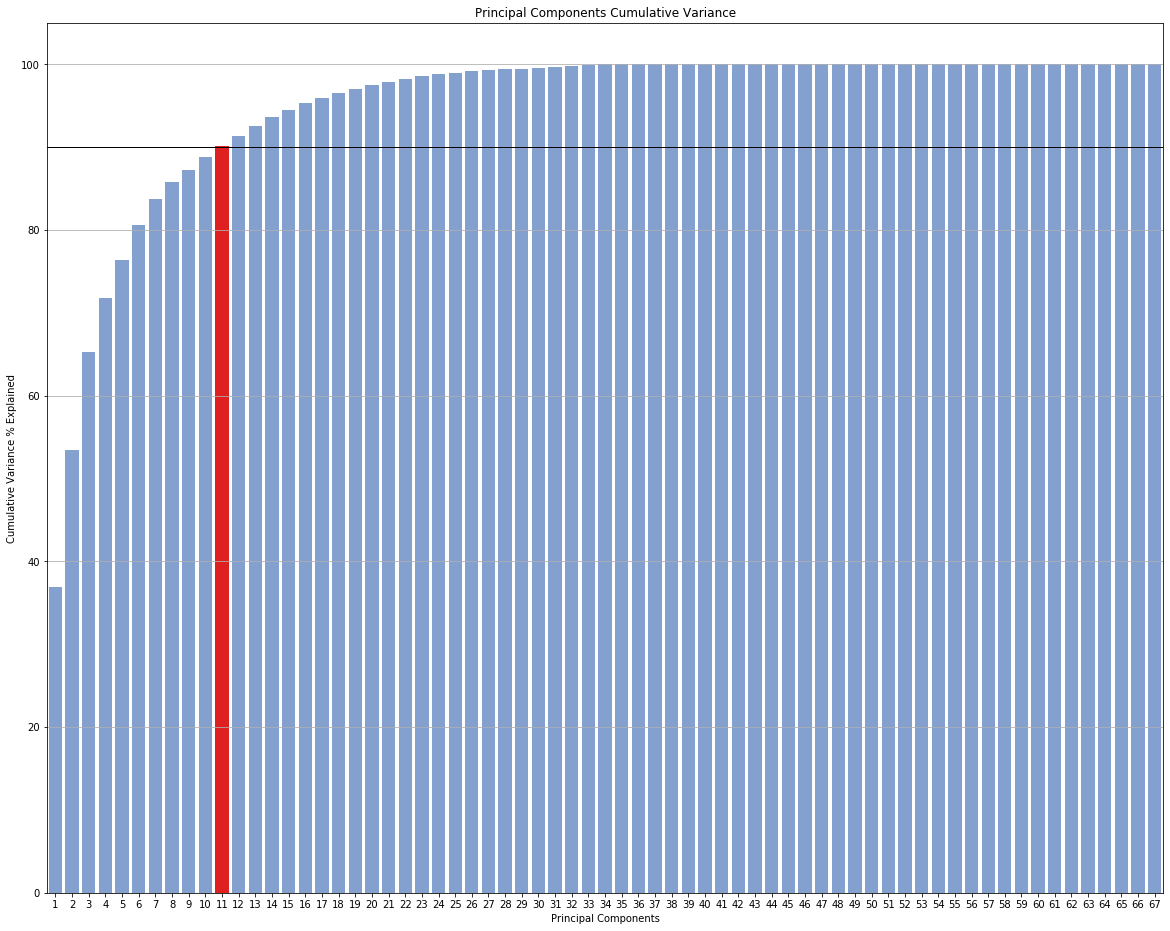

In [14]:
pca_df = pca_function(national, 90, show_scree_plot=True)

In [0]:
#pca_df = pca_function(national_processed, 90, show_scree_plot=True)

# Stretch Goals

## 1) Perform further data exploration on the HADS national dataset (the version before we one-hot encoded it) Make scatterplots and see if you can see any resemblance between the original scatterplots and the plot of the principal components that you made in 7.1. 

(You may or may not not see very much resemblance depending on the variables you choose, and that's ok!)

## 2) Study "Scree Plots" and then try and make one for your PCA dataset. How many principal conponents do you need to retain in order for your PCs to contain 90% of the explained variance? 

We will present this topic formally at the beginning of tomorrow's lecture, so if you figure this stretch goal out, you're ahead of the game. 

## 3) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

Prioritize self-study over this stretch goal if you are not semi-comfortable with the topics of PCA, Eigenvalues, and Eigenvectors.

![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)